# MiniVGGNet

VGGNet, (sometimes referred to as simply VGG), was first
introduced by Simonyan and Zisserman in their 2014 paper, Very Deep Learning Convolutional
Neural Networks for Large-Scale Image Recognition. The primary contribution of their work
was demonstrating that an architecture with very small (3×3) filters can be trained to increasingly
higher depths (16-19 layers) and obtain state-of-the-art classification on the challenging ImageNet
classification challenge.

VGGNet is unique in that it uses 3×3 kernels throughout the entire architecture.


## Import necessary libraries

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.datasets import cifar10

## Define the model architecture

In [2]:
class MiniVGGNet:
  @staticmethod
  def build(width, height, depth, classes):
    # initialize the model along with the input shape to be
    # "channels last" and the channels dimension itself
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    # if we are using "channels first", update the input shape
    # and channels dimension
    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)
      chanDim = 1

    # first CONV => RELU => CONV => RELU => POOL layer set
    model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(32, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # second CONV => RELU => CONV => RELU => POOL layer set
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    # first (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    # return the constructed network architecture
    return model

## Preprocess data

In [3]:
# load the training and testing data, then scale it into the
# range [0, 1]
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
                 "dog", "frog", "horse", "ship", "truck"]

[INFO] loading CIFAR-10 data...
170500096/170498071 [==============================] - 3s 0us/step


## Compile and train the network

In [4]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01, decay=0.01 / 40, momentum=0.9, nesterov=True)
model = MiniVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
                 batch_size=64, epochs=40, verbose=1)

[INFO] compiling model...
[INFO] training network...
Epoch 1/40
782/782 [==============================] - 41s 10ms/step - loss: 2.0021 - accuracy: 0.3745 - val_loss: 1.2173 - val_accuracy: 0.5679
Epoch 2/40
782/782 [==============================] - 7s 9ms/step - loss: 1.2081 - accuracy: 0.5809 - val_loss: 0.9455 - val_accuracy: 0.6690
Epoch 3/40
782/782 [==============================] - 7s 9ms/step - loss: 0.9859 - accuracy: 0.6544 - val_loss: 0.8123 - val_accuracy: 0.7137
Epoch 4/40
782/782 [==============================] - 7s 9ms/step - loss: 0.8622 - accuracy: 0.6984 - val_loss: 0.7552 - val_accuracy: 0.7376
Epoch 5/40
782/782 [==============================] - 7s 9ms/step - loss: 0.7807 - accuracy: 0.7271 - val_loss: 0.7357 - val_accuracy: 0.7442
Epoch 6/40
782/782 [==============================] - 7s 9ms/step - loss: 0.7269 - accuracy: 0.7413 - val_loss: 0.7196 - val_accuracy: 0.7484
Epoch 7/40
782/782 [==============================] - 7s 9ms/step - loss: 0.6892 - accuracy: 

## Evaluate the network

In [5]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=labelNames))

[INFO] evaluating network...
              precision    recall  f1-score   support

    airplane       0.87      0.84      0.85      1000
  automobile       0.92      0.90      0.91      1000
        bird       0.76      0.75      0.75      1000
         cat       0.70      0.65      0.68      1000
        deer       0.76      0.84      0.80      1000
         dog       0.74      0.77      0.75      1000
        frog       0.85      0.89      0.87      1000
       horse       0.90      0.84      0.87      1000
        ship       0.90      0.91      0.91      1000
       truck       0.87      0.90      0.88      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



## Plot the training/val loss and accuracy

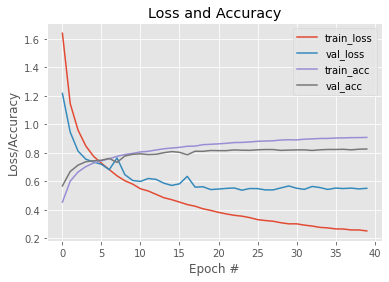

In [6]:

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), H.history["val_accuracy"], label="val_acc")
plt.title("Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

# We can see that MiniVGGNet is obtaining 83% classification accuracy on the CIFAR-10 dataset with batch normalization.